# MATH 210 Project: Community Well-Being During the Economic Crisis
### April 09, 2018

### Introduction

Our project will study how community well-being was affected during the financial crisis in 2008. We will study datasets from [Statistics Canada](https://open.canada.ca/data/en/dataset/56578f58-a775-44ea-9cc5-9bf7c78410e6) regarding The Community Well-Being (CWB) Index data. The motivation of our project is to discover how the four socio-economic indicators of communiy well-being, including education, labour force activity, income, and housing, have changed between the years 1981 to 2011, as well as what siginificant impact the financial crisis in 2008 had on these factors. We wish to plot and study these ["scores"](http://www.aadnc-aandc.gc.ca/eng/1100100016579/1100100016580) of socio-economic factors to understand the effect of the financial crisis 2008. Through our results, we hope to gain insight on the measurable impact and any correlations between these socio-economic indicators and an individual's wellbeing.

### Questions to Study:

1. Is quality of life improving over the years? If so, how? 
2. Do significant gaps exist? If so, where?
3. What correlations exist between an individual's wellbeing and their
    * labour force activity
    * education level
    * income level
    * housing

### Summary

1. The averages of all four indicators of socio-economic well-being have continually increased between 1981-2006. The housing and income levels, however, dipped well below the previous recorded year's (2006) average amounts of 91 and 77, respectively, in 2011. This may be due to the financial crisis in 2008. Overall, the quality of life seems to have an upward trend, with the exception of the housing and income levels, possibly as a result of the financial crisis in 2008.
2. Significant gaps exist for all four indicators between 2006 to 2011. Specifically, housing and income levels have decreased drastically, while education and labour force activities have increased.
3. It seems that there are correlations between income/housing and education/labour force activities. While housing and income levels were experiencing an all-time low, the education and labour force activities peaked. 

### Table of Contents

1. Introduce the data
    * Simplify the data
2. Plot the data
3. Study the data
4. Compare the data
5. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introducing the data


[The Community Well-Being (CWB) Index](https://open.canada.ca/data/en/dataset/56578f58-a775-44ea-9cc5-9bf7c78410e6) dataset assesses the socio-economic well-being indicators in Canadian communities. These indicators of well-being include: education, labour force activity, income, and housing, which are derived from Statistics Canada's Census of Population. These indicators are combined to give each community a well-being "score" and these scores are used to compare well-being across communities. We will study the dataset of years readily available to the public, which include: 1981, 1991, 1996, 2006, and 2011. 

The CSV dataset includes information related to 'Community type' (column 0), 'Census Subdivision code' (column 7) and 'CWB / IBC' (column 8), which we are not concerned about, so we use columns 1 through 6 to display the information that we are interested in (CSD Name, Census Population, Income, Education, Housing, Labour Force Activity, and Year). There are some names in the dataset containing french accent characters and so we need to specify the encoding option as `latin` for the function `pandas.read_csv` to import the file properly. Because there is missing data, the CSV file uses ' ' to represent the empty values, so we assign these values as NaN using the command `na_values`. We rename the columns using the function `df.columns` ('CSD Name','Census Population','Income','Education','Housing','Labour Force Activity') because every dataset includes the year (i.e., 1981, 1991, ...) in the column title. This makes it hard to import with all the different column names. Therefore, after unifying the column name, we decide to add another column specifying the year. 

In [2]:
df = pd.read_csv('cwb_1981_1452011068965_eng.csv',encoding='latin',na_values=' ',usecols=[1,2,3,4,5,6])
df.columns=['CSD Name','Census Population','Income','Education','Housing','Labour Force Activity']
df['Year'] = 1981

We see that there are 5,710 unique lines of data and 7 columns. Each row represents a Canadian community. The columns are as follows (see [The Community Well-Being (CWB) Index](http://www.aadnc-aandc.gc.ca/eng/1100100016579/1100100016580) for more information on the subject):

* **CSD Name**: the entries of this column are strings containing the names of each community
* **Census Population**: the entries of this column are integers that represent the population of each community
* **Income**: Income is calculated based on total income per capita
* **Education**: Education looks at how many community members have at least a high school education and how many have attained a university degree
* **Housing**: Housing looks at the number of community members whose homes are in an adequate state of repair and are not overcrowded
* **Labour Force Activity**: Labour force activity looks at how many community members participate in the labour force and how many labour force participants have jobs
* **Year**: Year of dataset

### 1.1 Simplify data

We simplify the data by eliminating the last row (year 1981). We display the table that includes the community (CSD) name, census population, as well as the four socio-economic well-being factors.

### Import data for 1991, 1996, 2001, 2006, and 2011. 

We now import our data for the years: 1991, 1996, 2001, 2006, and 2011. We find the mean for each of the four socio-economic well-being indicators (Income, Education, Housing, and Labour Force Activity) and keep the census population in our table. We display this table with the data in the years mentioned.

In [3]:
data_1991 = pd.read_csv('cwb_1991_1452011086094_eng.csv',encoding='latin',na_values=' ',usecols=[1,2,3,4,5,6],thousands=",")
data_1991.columns = ['CSD Name','Census Population','Income','Education','Housing','Labour Force Activity']

In [4]:
data_1991['Year'] = 1991

In [5]:
df = df.append(data_1991,ignore_index=False)

In [6]:
df.groupby('Year').mean()

,Census Population,Income,Education,Housing,Labour Force Activity
Year,,,,,
1981,4263.254116,67.216825,27.842791,89.364098,79.376242
1991,4604.733300,72.147131,34.785666,91.069435,80.980799


In [7]:
data_1996 = pd.read_csv('cwb_1996_1452011101491_eng.csv',encoding='latin',na_values=' ',thousands=",",usecols=[1,2,3,4,5,6])
data_1996.columns = ['CSD Name','Census Population','Income','Education','Housing','Labour Force Activity']

In [8]:
data_1996['Year'] = 1996

In [9]:
data_2001 = pd.read_csv('cwb_2001_1452011117544_eng.csv',encoding='latin',na_values=' ',thousands=",",usecols=[1,2,3,4,5,6])
data_2001.columns = ['CSD Name','Census Population','Income','Education','Housing','Labour Force Activity']

In [10]:
data_2001['Year'] = 2001

In [11]:
data_2006 = pd.read_csv('cwb_2006_1452011133706_eng.csv',encoding='latin',na_values=' ',thousands=",",usecols=[1,2,3,4,5,6])
data_2006.columns = ['CSD Name','Census Population','Income','Education','Housing','Labour Force Activity']

In [12]:
data_2006['Year'] = 2006

In [13]:
data_2011 = pd.read_csv('cwb_2011_1452011148713_eng.csv',encoding='latin',na_values='*',thousands=",",usecols=[1,2,3,4,5,6])
data_2011.columns = ['CSD Name','Census Population','Income','Education','Housing','Labour Force Activity']
data_2011['Year'] = 2011

In [14]:
def percentage_to_float(x):
    if isinstance(x, str):
        x = float(x.rstrip('%'))
    return x

In [15]:
data_2011['Income'] = data_2011['Income'].apply(percentage_to_float)

In [16]:
df = df.append([data_1996,data_2001,data_2006,data_2011])

In [17]:
df['Income'] = df['Income'].apply(percentage_to_float)

In [18]:
df['Average Labour Force Activity'] = df['Labour Force Activity']/df['Census Population']

### 1.1 Simplify data

We calculate the average across all communities in the relevant years using the command `groupby`.

In [19]:
df_mean = df.groupby('Year').mean()

In [20]:
df_mean

,Census Population,Income,Education,Housing,Labour Force Activity,Average Labour Force Activity
Year,,,,,,
1981,4263.254116,67.216825,27.842791,89.364098,79.376242,0.087771
1991,4604.733300,72.147131,34.785666,91.069435,80.980799,0.088700
1996,4883.487557,71.898286,38.163735,91.191475,80.491204,0.088842
2001,5388.248833,74.861776,40.817615,91.156687,81.795908,0.091921
2006,5858.579874,77.451400,48.099577,91.301373,82.977813,0.094561
2011,6410.702413,38.469422,80.854803,51.614629,90.382096,0.084304


## 2. Plotting the data

Below we plot the income, education, average labour force activity, and housing averages between 1981 - 2011. We also plot each individual indicator to further recognize and study any fluctuations or patterns. The description/units of each indicator are as follows:

* **Income**: Scores are included only if the community has a population of at least 250 individuals and 
    * 40 households 
    * or the total number of individuals in the CSD with income had at least an unweighted count of 4 and weighted count of 10
* **Education**: Scores are included only if the community has a population of at least 250 individuals and 
    * 40 households 
    * or the sum of the numerators used to calculate the Education component had at least an unweighted count of 4 and weighted count of 10
* **Housing**: Scores are included only if the community has a population of at least 250 individuals and 
    * 40 households
    * or the sum of the numerators used to calculate the Housing component had at least an unweighted count of 4 and weighted count of 10
* **Labour Force Activity**: Scores are included only if the community has a population of at least 250 individuals and 
    * 40 households
    * or the sum of the numerators used to calculate the Labour Force Activity component had at least an unweighted count of 4 and weighted count of 10

In [21]:
df_mean

,Census Population,Income,Education,Housing,Labour Force Activity,Average Labour Force Activity
Year,,,,,,
1981,4263.254116,67.216825,27.842791,89.364098,79.376242,0.087771
1991,4604.733300,72.147131,34.785666,91.069435,80.980799,0.088700
1996,4883.487557,71.898286,38.163735,91.191475,80.491204,0.088842
2001,5388.248833,74.861776,40.817615,91.156687,81.795908,0.091921
2006,5858.579874,77.451400,48.099577,91.301373,82.977813,0.094561
2011,6410.702413,38.469422,80.854803,51.614629,90.382096,0.084304


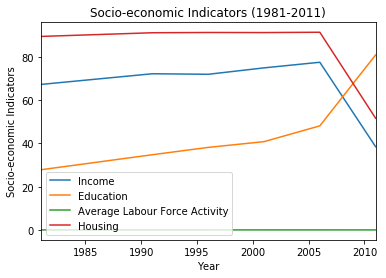

In [40]:
df_mean[['Income','Education','Average Labour Force Activity','Housing']].plot()
plt.xlabel('Year'), plt.ylabel('Socio-economic Indicators')
plt.title('Socio-economic Indicators (1981-2011)')
plt. show()

In the above graph (1981-2011), we observe drastic changes between 2006 to 2011. Between 2006-2011, we compare 'Housing' (in red) to:
    * Income; linearly increasing relationship 
    * Education; linearly decreasing relationship
    * To examine average labour force, we plot it by itself

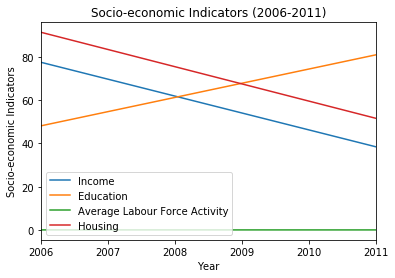

In [39]:
df_mean.iloc[4:6][['Income','Education','Average Labour Force Activity','Housing']].plot()
plt.xlabel('Year'), plt.ylabel('Socio-economic Indicators')
plt.title('Socio-economic Indicators (2006-2011)')
plt. show()

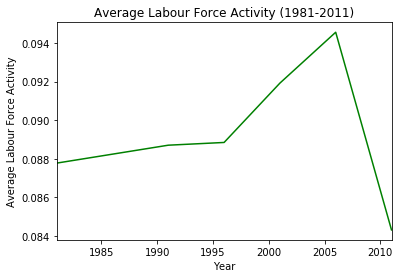

In [46]:
df.groupby('Year')['Average Labour Force Activity'].mean().plot(c='g')
plt.ylabel('Average Labour Force Activity')
plt.title('Average Labour Force Activity (1981-2011)')
plt.show()

In [ ]:
# We can see that alfa is decreasing over 2006 - 2011. 
# Therefore, housing and alfa has linear increasing relationship.

To examine each socio-economic indicator closely, we graph them individually and plot the details between 1981-2011.

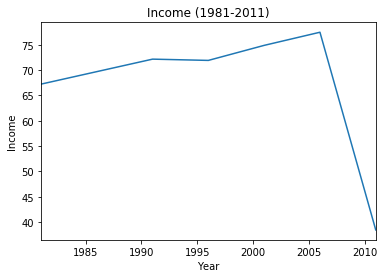

In [23]:
df.groupby('Year')['Income'].mean().plot()
plt.ylabel('Income')
plt.title('Income (1981-2011)')
plt.show()

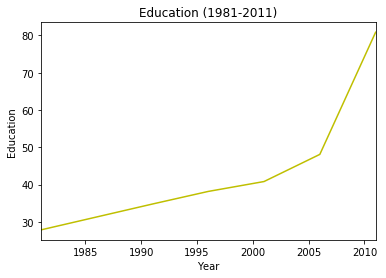

In [25]:
df.groupby('Year')['Education'].mean().plot(c='y')
plt.ylabel('Education')
plt.title('Education (1981-2011)')
plt.show()

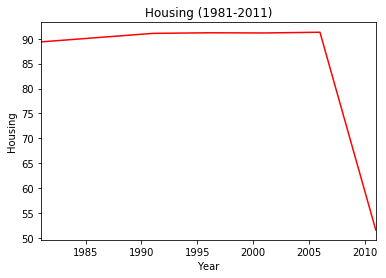

In [42]:
df.groupby('Year')['Housing'].mean().plot(c='r')
plt.ylabel('Housing')
plt.title('Housing (1981-2011)')
plt.show()

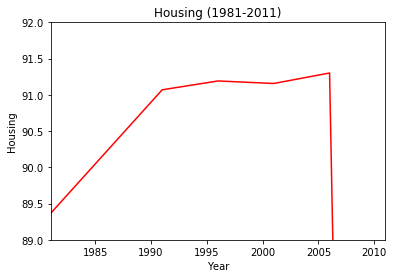

In [49]:
df.groupby('Year')['Housing'].mean().plot(c='r')
plt.ylabel('Housing')
plt.title('Housing (1981-2011)')
plt.ylim(89,92)
plt.show()

## 3. Studying the data

In studying our plots above, we can clearly observe drastic spikes or dips between 2005 to 2010. This begs the question: Did the financial crisis in 2008 cause these patterns that spanned across all four socio-economic indicators of well-being? Further questions we wish to address include:

1. Is quality of life improving over the years? If so, how? 
2. Do significant gaps exist? 
3. Did the financial crisis in 2008 impact these socio-economic factors? 

We will begin to answer these questions by finding the correlations between the years in question (1981, 1991, 1996, 2001, 2006) to see if this phenomenon applies to the previous years. 

## 4. Comparing the data

We observe drastic dips in housing and income, and spikes in labour and education between 2006-2011. Supplementary questions we wish to study from these spikes and dips in data collected include: 
1. What does this say about the correlation between 
    * housing and labour?
    * housing and education?
    * housing and average labour force activity?
2. How are the four indicators normally correlated? 
3. Did the financial crisis in 2008 affect these socio-economic indicators?

We will begin to answer our questions by observing the population's behaviour before the financial crisis in 2008 (specifically, data between 1981 to 2006). In doing so, we will gain a better understanding of how the crisis in 2008 has affected people's behaviors (from the four indicators). We will do so by comparing the housing levels to the other three socio-economic indicators by calculating their linear regression relationship. We have used the function `np.matrix(.....)` below to set HOUSING as $X$ in the regression formula $(X^T X)A = X^TY$. The matrix created below is for 1981 - 2011. 

In [27]:
np.matrix(np.array([np.ones(6), df_mean['Housing'].values])).T

matrix([[  1.        ,  89.36409803],
        [  1.        ,  91.06943514],
        [  1.        ,  91.19147497],
        [  1.        ,  91.15668663],
        [  1.        ,  91.30137348],
        [  1.        ,  51.61462882]])

We have used `iloc[0:5]` to study the trends between 1981 - 2005 so that we can compare that to the trend in 2006 - 2011.

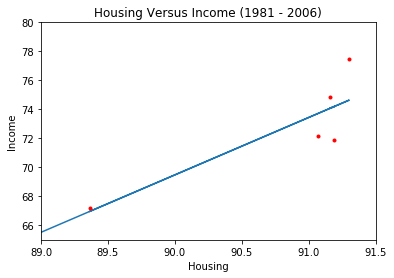

In [63]:
HOUSING = np.array([np.ones(5), df_mean['Housing'].iloc[0:5].values])
HOUSING = np.matrix(HOUSING).T
INCOME = df_mean['Income'].iloc[0:5].values
INCOME = np.matrix(INCOME).T

H_INCOME = (HOUSING.T * HOUSING)**(-1) * HOUSING.T * INCOME

housing = df_mean['Housing'].values
income = H_INCOME[0,0] + H_INCOME[1,0]*housing
plt.plot(housing,income,HOUSING[:,1],INCOME,'r.')
plt.xlabel('Housing'), plt.ylabel('Income')
plt.title('Housing Versus Income (1981 - 2006)')
plt.xlim(89,91.5)
plt.ylim(65,80)
plt.show()

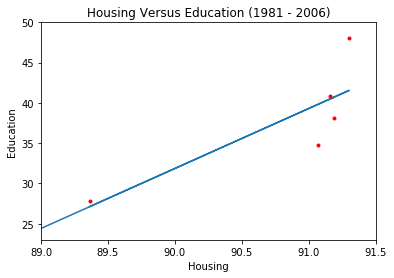

In [62]:
EDUCATION = df_mean['Education'].iloc[0:5].values
EDUCATION = np.matrix(EDUCATION).T

H_EDUCATION = (HOUSING.T * HOUSING)**(-1) * HOUSING.T * EDUCATION

housing = df_mean['Housing'].values
education = H_EDUCATION[0,0] + H_EDUCATION[1,0]*housing
plt.plot(housing,education,HOUSING[:,1],EDUCATION,'r.')
plt.xlabel('Housing'), plt.ylabel('Education')
plt.title('Housing Versus Education (1981 - 2006)')
plt.xlim(89,91.5)
plt.ylim(23,50)
plt.show()


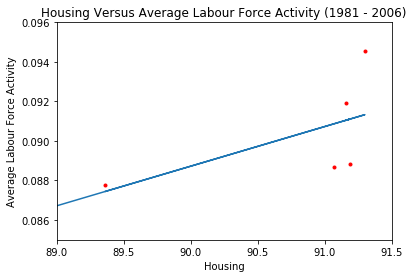

In [70]:
ALFA = df_mean['Average Labour Force Activity'].iloc[0:5].values
ALFA = np.matrix(ALFA).T

H_ALFA = (HOUSING.T * HOUSING)**(-1) * HOUSING.T * ALFA

housing = df_mean['Housing'].values
alfa = H_ALFA[0,0] + H_ALFA[1,0]*housing
plt.plot(housing,alfa,HOUSING[:,1],ALFA,'r.')
plt.xlabel('Housing'), plt.ylabel('Average Labour Force Activity')
plt.title('Housing Versus Average Labour Force Activity (1981 - 2006)')
plt.xlim(89,91.5)
plt.ylim(0.085,0.096)
plt.show()

# Increasing

While other relationships between indicators remain constant, the relationship between housing and education has changed. We can further observe the relationship between housing prices and higher education by referring to [The Society Page](https://thesocietypages.org/socimages/2010/09/24/the-relationship-between-housing-prices-and-higher-education/). 

![Python Logo](https://thesocietypages.org/socimages/files/2010/09/tuitionhomes.jpg)

The graph suggests that after the financial crisis in 2008, people had less money to spend on education because the housing levels increased. We observe that education and housing price increased at relatively the rate before 2008.

## 5. Concluding Remarks and Questions for Future Research

In this report, we presented the data between the years 1981-2011 for the four socio-economic indicators of The Community Well-Being (CWB) Index. To study this, we first plot the data averages of all four indicators to compare the relationships between them. We then observe the relationships individually by plotting 'Housing' with the other three indicators to study the correlations.

We conclude with the results from our plots that the relationship between housing and education levels are related. Our results suggest that after the financial crisis in 2008, people had less money to spend on education. This may be a result of the increase in housing levels during the same time. The relationships between the other indicators seemed to have linearly increasing relationships.